In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
Date = './2025-01-16/'
data_mot_off = np.array([])


for B in range(3, 9):
  for D in range(1038, 1046, 2):
    df = pd.read_csv(Date + f'B={B}_D={D}.csv')
    Sig = df['Sig [V]']
    time = df['Time [s]']
    sig_mot_off = Sig[time < 0.9]
    data_mot_off = np.concat([data_mot_off, sig_mot_off - np.mean(sig_mot_off)])

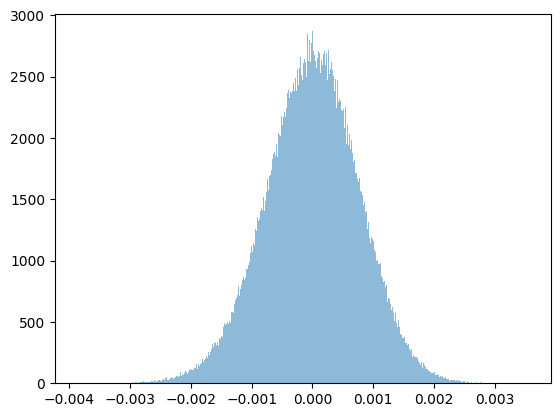

In [37]:
plt.hist(data_mot_off, bins=int(np.sqrt(len(data_mot_off))), alpha=0.5, label='Motor Off')
plt.show()

In [38]:
sigmas = []

for B in range(3, 9):
  sigma_D = []
  for D in range(1038, 1046, 2):
    df = pd.read_csv(Date + f'B={B}_D={D}.csv')
    Sig = df['Sig [V]']
    time = df['Time [s]']
    data_mot_on = Sig[(time > 3) * (time < 4.5)]
    sigma_D.append(np.std(data_mot_on))
  sigmas.append(sigma_D)

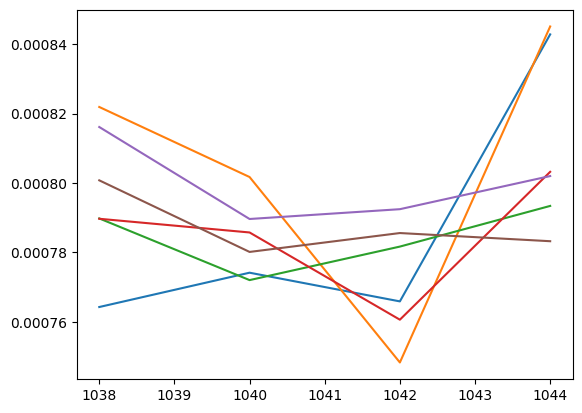

In [39]:
for i, B in enumerate(range(3, 9)):
  plt.plot(range(1038, 1046, 2), sigmas[i], label=f'B={B}')

plt.show()